# Exploratory Data Analysis of Powercreep in Pokemon

Original dataset taken from Josh Korngiebel on Kaggle.
https://www.kaggle.com/datasets/jkorn28/pokemon-stats-gens-1-9 

Dataset modified by me in the data prep folder. All operations in this notebook will be using the modified csv file.

## <h1 style="text-align: center;">Introduction</h1>

### **Background**

Standing head and shoulders over every single media company and intellectual property group in the world is Pokemon. As the highest grossing media franchise of all time, Pokemon has cemented, no matter how big or small, a place in the minds of almost everyone. Because of the many games and multiplayer features added, communities of hobbyists dedicated to competitive Pokemon battling have developed. 

These hobbyists have developed remarkably optimized Pokemon teams, and continue to battle online with a thriving competitive scene. Everytime a new generation of Pokemon is released, the online competitive scene has to scramble to adjust to what has been deemed "powercreep". Powercreep is a term used throughout gaming to generally refer to the phenomenon of new > old, that is, new content released by the maker of the game more often than not tend to outclass older content.

### **Goal**

Leveraging Python libraries, we hope to both quantify and visualize the effect of powercreep. This will be done by analyzing what makes a Pokemon "strong", and using that as a metric to view powercreep over the 9 generations of Pokemon.

## <h1 style="text-align: center;">Table of Contents</h1>

1. The Data
    - Loading
    - Previewing & Explaining
    - Error Checking
        - The Extreme Outlier
        - Suspicious Stats
        - Type Testing
1. Analysis
    - Stat Distributions
        - Global Averages and Medians
        - Generational Averages and Medians
    - Special Pokemon
        - Legendaries
        - Mythicals
        - Notables
        - "Optimized" Pokemon (note to self, make a scatterplot or some other one of all pokemon with bst on x and standard deviation on y and color them by generation)
        - Average Type Weakness
1. Conclusions
    

## <h1 style="text-align: center;">The Data</h1>

### **Loading (+ Libraries)**

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [79]:
pokedf = pd.read_csv('pokemon_data_custom.csv')

The data has already been prepared in another folder on this repository. For more detailed information on what changes were made to the original dataset by Josh Korngiebel, refer to that folder. Briefly, useful columns were added for classification, and 7 missing Pokemon were added.

### **Previewing & Explaining**

In [80]:
pokedf.head()

,Dex No,Name,Base Name,Type 1,Type 2,BST,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary,Mythical,Notable
0,1,Bulbasaur,Bulbasaur,GRASS,POISON,318,45,49,49,65,65,45,1,False,False,False
1,2,Ivysaur,Ivysaur,GRASS,POISON,405,60,62,63,80,80,60,1,False,False,False
2,3,Venusaur,Venusaur,GRASS,POISON,525,80,82,83,100,100,80,1,False,False,False
3,3,Mega Venusaur,Venusaur,GRASS,POISON,625,80,100,123,122,120,80,1,False,False,False
4,4,Charmander,Charmander,FIRE,-,309,39,52,43,60,50,65,1,False,False,False


In [81]:
pokedf.tail()

,Dex No,Name,Base Name,Type 1,Type 2,BST,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary,Mythical,Notable
1196,1013,Sinistcha,Sinistcha,GRASS,GHOST,508,71,60,106,121,80,70,9,False,False,False
1197,1014,Okidogi,Okidogi,POISON,FIGHTING,555,88,128,115,58,86,80,9,True,False,False
1198,1015,Munkidori,Munkidori,POISON,PSYCHIC,555,88,75,66,130,90,106,9,True,False,False
1199,1016,Fezandipiti,Fezandipiti,POISON,FAIRY,555,88,91,82,70,125,99,9,True,False,False
1200,1017,Ogerpon,Ogerpon,GRASS,-,550,80,120,84,60,96,110,9,True,False,False


The data contains 16 columns.
- Dex No: Refers to the official *Pokedex* number, of the Pokemon. Every Pokemon has a unique Pokedex number, or as it will be referred to, Dex number.

- Name: Self explanatory with one caveat, certain Pokemon are considered *alternate forms*, that is, they are the same species of Pokemon, but simply a different variant. One example is the Mega Venusaur visible in the dataframe head. Notice the entry shares the same Dex number as its base form, Venusaur.

- Base Name: Every Pokemon has the same Base Name as Name, except the aformentioned variants, who instead have the name of the original form.

- Type 1 and 2: There are 18 elemental "types" of Pokemon, which will be explained in more detail later. Notice that not all Pokemon have two types, some only have one. In that case, the Type 2 column will have a placeholder '-'.

- BST, HP, Attack, Defense, Sp. Attack, Sp. Defense, and Speed: HP through Speed all refer to different stats of a Pokemon. "Sp" in two of the columns stands for "Special" which just refers to a slightly different but equally important Attack and Defense stat. "HP" stands for "Health Points". BST is simply the total of these six fundamental stats. Note that higher = better when it comes to stats.

- Generation: Pokemon are released not one by one, but in large batches, referred to as "Generations", or more colloquially, just "Gens". There are currently nine generations of Pokemon, and this column assigns the corresponding generation number to each Pokemon. 

- Legendary, Mythical, and Notable: These are all special classes of Pokemon. Legendary and Mythical and official designations by the Pokemon Company. Notable is a classification I have chosen to add to Pokemon that miscellaneously special, and are not officially Legendary or Mythical.

### **Error Testing**

#### The Extreme Outlier

Publicly online we can see what should be the highest and lowest stats in each category, so it should be simple to see if there are any extreme outliers. Before we do this, we will manually remove a Pokemon that, while technically is in the Pokedex, is not obtainable in game, and therefore should not be considered. This Pokemon is Eternamax Eternatus, a Pokemon meant only as a one-time boss battle.

This was not done in the data prep file in order to not have a missing Pokemon in case anyone else wishes to use the csv file.

In [82]:
pokedf = pokedf[pokedf['Name'] != "Eternamax"]

In [83]:
# verify that the Pokemon was removed by checking for all Pokemon with its Base Name
pokedf[pokedf['Base Name'] == "Eternatus"]

,Dex No,Name,Base Name,Type 1,Type 2,BST,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Generation,Legendary,Mythical,Notable
1057,890,Eternatus,Eternatus,POISON,DRAGON,690,140,85,95,145,95,130,8,True,False,False


#### Suspicious Values

In [84]:
# highest and lowest recorded stats taken directly from the online resource, Bulbapedia
stat_extremes = {
    'BST': {'min': 175, 'max': 1125},
    'HP': {'min': 1, 'max': 255},
    'Attack': {'min': 5, 'max': 190},
    'Defense': {'min': 5, 'max': 230},
    'Sp. Attack': {'min': 10, 'max': 194},
    'Sp. Defense': {'min': 20, 'max': 230},
    'Speed': {'min': 5, 'max': 200}
}

# iterate through the stats
for stat, extremes in stat_extremes.items():
    min_value = extremes['min']
    max_value = extremes['max']

    # store checks as booleans
    has_below_min = (pokedf[stat] < min_value).any()
    has_above_max = (pokedf[stat] > max_value).any()

    # print results
    if has_below_min:
        print(f"At least one Pokémon has a {stat} stat below {min_value}.")

    if has_above_max:
        print(f"At least one Pokémon has a {stat} stat above {max_value}.")

    if not has_below_min and not has_above_max:
        print(f"No Pokémon have {stat} stats below {min_value} or above {max_value}.")


No Pokémon have BST stats below 175 or above 1125.
No Pokémon have HP stats below 1 or above 255.
No Pokémon have Attack stats below 5 or above 190.
No Pokémon have Defense stats below 5 or above 230.
No Pokémon have Sp. Attack stats below 10 or above 194.
No Pokémon have Sp. Defense stats below 20 or above 230.
No Pokémon have Speed stats below 5 or above 200.


There don't appear to be any major outlying stats.

#### Type Testing

A simple test to make sure there are no typos or unexpected values for the Pokemon types.

In [85]:
print(f"Number of unique values in 'Type 1' column: {pokedf['Type 1'].nunique()}")
print(f"Number of unique values in 'Type 2' column: {pokedf['Type 2'].nunique()}")

Number of unique values in 'Type 1' column: 18
Number of unique values in 'Type 2' column: 19


There are 18 types in Pokemon, and for the dataset, a placeholder '-' for the secondary typing of monotype Pokemon, so there are no unexpected values.

With that, we have finished verifying the accuracy of our dataset. Note that mispellings of Pokemon names could be present, but since in the data preparation we made sure that all Pokemon are labelled with the correct generation, it doesn't matter whether there are any spelling mistakes in names.

## <h1 style="text-align: center;">Analysis</h1>

### **Stat Distributions**

#### Generational Averages and Medians

Checking for average base stats total by generation for any obvious signs of powercreep.

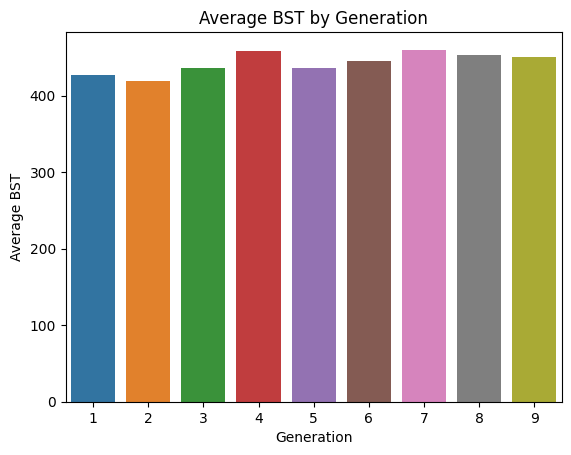

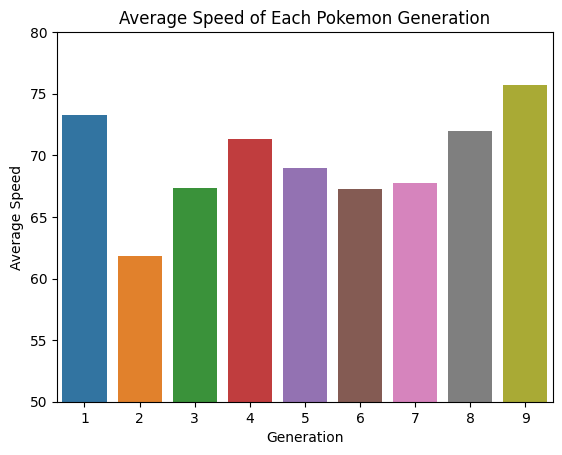

In [109]:
sns.barplot(x='Generation', y='BST', errorbar = None, data=pokedf)
plt.title("Average BST by Generation")
plt.xlabel("Generation")
plt.ylabel("Average BST")
plt.show()

# speed barplot, y-axis is limited because even a small speed difference makes a large difference in a Pokemon's power
# speed margin doesn't matter when deciding who moves first, so essentially losing in speed in a 5 vs 100 scenario is equally as bad as losing in speed in a 99 vs 100 scenario
sns.barplot(x = 'Generation', y = 'Speed', errorbar = None, data = pokedf)
plt.title("Average Speed of Each Pokemon Generation")
plt.xlabel("Generation")
plt.ylabel("Average Speed")
plt.ylim(50, 80)
plt.show()

In [106]:
# open the txt Smogon file and read its contents, splitting it into lines
# Smogon is a website that the competitive Pokemon community uses to simulate battles, and they have their monthly data publicized
with open('smogon.com_stats_2023-08_gen9ou-1825.txt', 'r') as file:
    smogon_usage = file.read().splitlines()

# initialize an empty list to store the parsed data
parsed_data = []

# iterate through the lines and extract the relevant information
for line in smogon_usage:
    # Split each line by '|'
    elements = line.split('|')
    
    # check if the line contains data for a Pokémon (lines containing '| Rank |' are headers)
    if len(elements) >= 8:
        rank = elements[1].strip()
        pokemon_name = elements[2].strip()
        usage_percentage = elements[3].strip()
        
        # Append the parsed data to the list
        parsed_data.append({
            'Rank': rank,
            'Pokemon Name': pokemon_name,
            'Usage Percentage': usage_percentage,
        })

for entry in parsed_data:
        print(entry)



{'Rank': 'Rank', 'Pokemon Name': 'Pokemon', 'Usage Percentage': 'Usage %'}
{'Rank': '1', 'Pokemon Name': 'Kingambit', 'Usage Percentage': '48.60382%'}
{'Rank': '2', 'Pokemon Name': 'Great Tusk', 'Usage Percentage': '47.11729%'}
{'Rank': '3', 'Pokemon Name': 'Iron Valiant', 'Usage Percentage': '30.05173%'}
{'Rank': '4', 'Pokemon Name': 'Gholdengo', 'Usage Percentage': '28.32315%'}
{'Rank': '5', 'Pokemon Name': 'Samurott-Hisui', 'Usage Percentage': '25.26610%'}
{'Rank': '6', 'Pokemon Name': 'Ting-Lu', 'Usage Percentage': '24.68835%'}
{'Rank': '7', 'Pokemon Name': 'Zapdos', 'Usage Percentage': '23.76084%'}
{'Rank': '8', 'Pokemon Name': 'Slowking-Galar', 'Usage Percentage': '21.72334%'}
{'Rank': '9', 'Pokemon Name': 'Landorus-Therian', 'Usage Percentage': '19.74743%'}
{'Rank': '10', 'Pokemon Name': 'Baxcalibur', 'Usage Percentage': '19.39256%'}
{'Rank': '11', 'Pokemon Name': 'Dragapult', 'Usage Percentage': '18.53447%'}
{'Rank': '12', 'Pokemon Name': 'Walking Wake', 'Usage Percentage': '14